# Step 1 - Select S&P500 Dataset and Schiller P/E-10 Dataset from the URLs

In [185]:
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataframe = pd.read_csv("HistoricalData_1648610849582.csv")
print(dataframe)

data_pe = pd.read_csv('S&P500 Schiller PE ratio.csv')
print(data_pe)

            Date  Close/Last Volume     Open     High      Low
0     03/28/2022     4575.52     --  4541.09  4575.65  4517.69
1     03/25/2022     4543.06     --  4522.91  4546.03  4501.07
2     03/24/2022     4520.16     --  4469.98  4520.58  4465.17
3     03/23/2022     4456.24     --  4493.10  4501.07  4455.81
4     03/22/2022     4511.61     --  4469.10  4522.00  4469.10
...          ...         ...    ...      ...      ...      ...
2545  04/05/2012     1398.08     --  1398.79  1401.60  1392.92
2546  04/04/2012     1398.96     --  1413.09  1413.09  1394.09
2547  04/03/2012     1413.38     --  1418.98  1419.00  1404.62
2548  04/02/2012     1419.04     --  1408.47  1422.38  1404.46
2549  03/30/2012     1408.47     --  1403.31  1410.89  1401.42

[2550 rows x 6 columns]
                 DateTime  SP500PERatio
0     1871-01-01 00:00:58         11.10
1     1871-02-01 00:00:58         11.25
2     1871-03-01 00:00:58         11.52
3     1871-04-01 00:00:58         11.85
4     1871-05-01 00

# Step 2 - Develop and test/verify a correlation-based algorithm

In [38]:
date_pe = data_pe[["DateTime"]].to_numpy(dtype = "str")
date_sp = dataframe[["Date"]].to_numpy(dtype = "str")

date_pe = np.flip(date_pe)
date_sp = np.flip(date_sp)


ratio_sp = data_pe['SP500PERatio'].to_numpy(dtype = 'float')
mean_sp = ratio_sp.mean()
max_sp = ratio_sp.max()
median_sp = np.median(ratio_sp)
print(mean_sp)
print(max_sp)
print(median_sp)

sp_index = dataframe[["Close/Last", "Open"]].to_numpy(dtype = 'float')
mean_sp_index = sp_index[:,0].mean()
mean_sp_index1 = sp_index[:,1].mean()

print(mean_sp_index)
print(mean_sp_index1)

16.126808278867102
123.73
14.955
(2550, 2)
2535.1493960784314
2510.4491058823533


In [269]:
#Merge the data of S$P500 and PE ration
record = []
for i in range(len(date_sp)):
    tmp = [0 for _ in range[3]]
    tmp[0] = sp_index[i][0]
    record_time = date_sp[i]
    for j in range(len(ratio_sp)):
        peDate = date_pe[j].split('/')
        if(len(peData)>=2 and len(peData[1])>0):
            if(record_time[6:10]==peData[2]):
                if peData[1]==record_time[0:2] or ('0'+peData[1])==record_time[0:2]:
                    tmp[1] = ratio_sp[j]
                    tmp[2] = record_time
                    record.append(tmp)

dataset = np.array(record)
    

TypeError: 'type' object is not subscriptable

In [ ]:
# Calculate the correlation scores

sampleNum = 100
for i in range(sampleNum-1 ,len(dataset)):
    # Pearson  r
    x = dataset[(i-sampleNum+1):(i+1), 0]
    y = dataset[(i-sampleNum+1):(i+1), 1]
    r = np.corrcoef(x, y)
    dataset[i][2] = r[0,1] 
dataset

In [267]:
plt.figure(figsize=(12, 6));
plt.plot(data_full.Date.loc[~data_full.Date.index.isin(list(range(nsample-1))) ],
         dataset[(nsample-1):, 2], color='grey', label='Close')
plt.title('The Correlation of S&P 500 close price and Shiller PE Ratio in 100 days')
plt.xlabel('Date')
plt.ylabel('Correlation')

NameError: name 'data_full' is not defined

<Figure size 864x432 with 0 Axes>

In [ ]:
# Buy the sp when r>0.9
money = 1
money_all = []
trade_all = []

# Must buy the new stock before sell
lastsell = -nsample

for i in range(1,dataset.shape[0]):
    tmp = norm.inverse_transform(dataset[i,:, :])
    
    prob_temp = tmp[:, 2]
    price_temp = tmp[:, 0]
    
    # Sell when has high prob
    if prob_temp[nsample-1] > 0.9 and (i-lastsell > nsample):
        
        
        # The buy at a low PE ration
        
        buy_price = min(price_temp)
        
        if buy_price > 0:
            sell_price = price_temp[len(price_temp)-1]
            
            money*= (sell_price/buy_price)
            
            lastsell = i
            money_all.append(money)
            trade_all.append(i)
            
            print(buy_price)
            print(sell_price)
            print(money)
            print(i)   
            

In [ ]:
# Make a plot

plt.figure(figsize=(12, 6));
plt.plot(data_full.Date.loc[trade_full],
         money_all, color='black', label='Close')
plt.title('Money left at the end of trading (using correlation algorithm)')
plt.xlabel('Date')
plt.ylabel('Money/millions')

# Step 3 - Design and develop a convolutional neural network (CNN) in Python that will recognize A-B-C-D-wave patterns

In [ ]:
# Juege if their exist a A-B-C-D wave, if exist, save it.
sellSigIdx = []
prev = 0
for x in range(nsample-1, len(dataset)):
    if dataset[x][2] > 0.90 and x >= prev+nsample//3 and \
    dataset[x][0] == max(dataset[(x-nsample+1):(x+1), 0]) and \
    dataset[x][0] > dataset[x+1][0]:
        sellSigIdx.append(x)
        prev = x

In [228]:
import torch.functional as F
import pdb
class CNet(nn.Module):
    def __init__(self, linear_input=20):
        super(CNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=20, kernel_size=5, stride=1)
        self.max_pool1 = nn.MaxPool1d(kernel_size=2, stride=1)
        self.ReLU = nn.ReLU()
        self.linear1 = nn.Linear(linear_input, 4)
        
    def forward(self, x):
       
        x = x.permute(0, 2, 1) 
        x = self.conv1(x)
        
        x =  self.ReLU( self.max_pool1(x) ) 
        
        x = x.view(x.size(0), -1)
        x = self.ReLU(self.linear1(x))
        x = x.unsqueeze(1)
        return x


class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.cnn = CNet()
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        
        self.fc = nn.Linear(hidden_dim, output_size)
        self.ReLU = nn.ReLU()
        
    
    def forward(self, x):
       
        x = self.cnn(x) 
        
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)

        out, hidden = self.rnn(x, hidden)
    
        out = self.fc(out)
    
        return out[:, -1, :], hidden
    
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [259]:
trainData = dataframe[["Close/Last", "Open",'High','Low']].to_numpy(dtype = 'float')
targetData = dataframe[["Close/Last"]].to_numpy(dtype = 'float')
date = dataframe[["Date"]].to_numpy(dtype = "str")

norm = MinMaxScaler(feature_range = (0, 1))
trainData = norm.fit_transform(trainData)
targetData = norm.fit_transform(targetData)
trainData = np.flip(trainData)
targetData = np.flip(targetData)
date = np.flip(date)
dateData = []
for i in range(date.shape[0]):
    dateData.append(float(np.squeeze(date)[i][6:10]) + ( (float(np.squeeze(date)[i][0:2])-1)*30 + float(np.squeeze(date)[i][3:5]) )/366 )
dateData = np.array(dateData)


In [260]:
window_size = 6
X = []
Y = []
for i in range(trainData.shape[0] - window_size - 4):
    X.append(trainData[i:i+window_size])
    Y.append(targetData[i+window_size:i+window_size+4])
X = np.array(X)
Y = np.array(Y)
Y = np.swapaxes(Y, 1, 2)
dateAxis = dateData[:-(window_size+4)]

In [270]:
X_fullTraining = []
X_training = []
X_validation = []
X_test = []
Y_fullTraining = []
Y_training = []
Y_validation = []
Y_test = []


X_fullTraining, X_test, Y_fullTraining, Y_test, date_ft, date_t = train_test_split(X, Y, dateAxis, test_size=0.3, shuffle=False)
X_training, X_validation, Y_training, Y_validation, date_tr, date_v = train_test_split(X_fullTraining, Y_fullTraining, date_ft, test_size=0.3, shuffle=False)
# date_test=date[438:623,:]

In [271]:
RNN = Model(input_size=4, output_size=4, hidden_dim=16, n_layers=1)
optimizer = torch.optim.Adam(RNN.parameters(), lr=0.01)
criterion = nn.MSELoss()
RNN

Model(
  (cnn): CNet(
    (conv1): Conv1d(4, 20, kernel_size=(5,), stride=(1,))
    (max_pool1): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (ReLU): ReLU()
    (linear1): Linear(in_features=20, out_features=4, bias=True)
  )
  (rnn): RNN(4, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=4, bias=True)
  (ReLU): ReLU()
)

In [272]:
xTensor = torch.from_numpy(X_fullTraining).float()
yTensor = torch.Tensor(Y_fullTraining).float()
epochs  =150

for epoch in range(epochs):
    optimizer.zero_grad()
    
    output, hidden = RNN(xTensor)
    loss = criterion(output.reshape(-1), yTensor.view(-1))
    loss.backward()
    
    optimizer.step()
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, epochs), end=' ')
        print("Loss:", loss.item())

Epoch: 0/150............. Loss: 0.19932858645915985
Epoch: 10/150............. Loss: 0.030063463374972343
Epoch: 20/150............. Loss: 0.018984023481607437
Epoch: 30/150............. Loss: 0.014503861777484417
Epoch: 40/150............. Loss: 0.01442941278219223
Epoch: 50/150............. Loss: 0.013628639280796051
Epoch: 60/150............. Loss: 0.012105864472687244
Epoch: 70/150............. Loss: 0.009297320619225502
Epoch: 80/150............. Loss: 0.005218460690230131
Epoch: 90/150............. Loss: 0.001321646966971457
Epoch: 100/150............. Loss: 0.00020518696692306548
Epoch: 110/150............. Loss: 0.00033481212449260056
Epoch: 120/150............. Loss: 0.00014590310456696898
Epoch: 130/150............. Loss: 0.00015019177226349711
Epoch: 140/150............. Loss: 0.0001289958308916539


# Step 4 - Train your CNN and RNN on your Training Set

In [273]:
# Calculate the accuracy, make a plot
def plotNoiselessGraphs(output_1,output_2,output_3,output_4,Y_main,Y_plot,XAxis_date,date_pred,
    set1_title_1,set2_title_1,set3_title_1,set4_title_1,error_title):
    
    table = []

    error = prediction_error(output_1, Y_main)
    error_dt = pd.DataFrame(data = error)
    temp1 = [np.mean(error), np.std(error), error_dt.skew(axis=0).iloc[0], error_dt.kurtosis(axis=0).iloc[0]]
    temp1 = np.array(temp1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_title(set1_title_1)
    ax1.plot(date_pred, output_1, color = 'blue', label = 'Pred')
    ax1.plot(XAxis_date, Y_plot, color = 'green', label = 'Actual')
    ax1.legend(loc="upper left")
    ax2.set_title(error_title)
    ax2.plot(date_pred, error, color = 'red', label = 'Pred error')
    ax2.legend(loc="upper left")

    error = prediction_error(output_2, Y_main)
    error_dt = pd.DataFrame(data = error)
    temp2 = [np.mean(error), np.std(error), error_dt.skew(axis=0).iloc[0], error_dt.kurtosis(axis=0).iloc[0]]
    temp2 = np.array(temp2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_title(set2_title_1)
    ax1.plot(date_pred, output_2, color = 'blue', label = 'Pred')
    ax1.plot(XAxis_date, Y_plot, color = 'green', label = 'Actual')
    ax1.legend(loc="upper left")
    ax2.set_title(error_title)
    ax2.plot(date_pred, error, color = 'red', label = 'Pred error')
    ax2.legend(loc="upper left")

    error = prediction_error(output_3, Y_main)
    error_dt = pd.DataFrame(data = error)
    temp3 = [np.mean(error), np.std(error), error_dt.skew(axis=0).iloc[0], error_dt.kurtosis(axis=0).iloc[0]]
    temp3 = np.array(temp3)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_title(set3_title_1)
    ax1.plot(date_pred, output_3, color = 'blue', label = 'Pred')
    ax1.plot(XAxis_date, Y_plot, color = 'green', label = 'Actual')
    ax1.legend(loc="upper left")
    ax2.set_title(error_title)
    ax2.plot(date_pred, error, color = 'red', label = 'Pred error')
    ax2.legend(loc="upper left")

    error = prediction_error(output_4, Y_main)
    error_dt = pd.DataFrame(data = error)
    temp4 = [np.mean(error), np.std(error), error_dt.skew(axis=0).iloc[0], error_dt.kurtosis(axis=0).iloc[0]]
    temp4 = np.array(temp4)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.set_title(set4_title_1)
    ax1.plot(date_pred, output_plt4, color = 'blue', label = 'Pred')
    ax1.plot(XAxis_date, Y_plot, color = 'green', label = 'Actual')
    ax1.legend(loc="upper left")
    ax2.set_title(error_title)
    ax2.plot(date_pred, error, color = 'red', label = 'Pred error')
    ax2.legend(loc="upper left")

    temp1 = np.expand_dims(temp1, axis=1)
    temp2 = np.expand_dims(temp2, axis=1)
    temp3 = np.expand_dims(temp3, axis=1)
    temp4 = np.expand_dims(temp4, axis=1)
    table = np.concatenate((temp1, temp2, temp3, temp4), axis=1)
    ind = ['Mean', 'STD-dev', 'Skewness', 'Kurtosis']
    col = ['1 day', '2 day', '3 day', '4 day']
    stats=pd.DataFrame(table, columns=col, index=ind).T
    display(stats)


In [274]:
output_plt = [None for _ in range(4)]

for i in range(4):
    output_plt[i] = output.detach().numpy()[:, 0]
    output_plt[i] = norm.inverse_transform(output_plt1.reshape(-1,1))
import pdb
#pdb.set_trace()
# output_plt2 = output.detach().numpy()[:, 1]
# output_plt2 = norm.inverse_transform(output_plt2.reshape(-1,1))

# output_plt3 = output.detach().numpy()[:, 2]
# output_plt3 = norm.inverse_transform(output_plt3.reshape(-1,1))

# output_plt4 = output.detach().numpy()[:, 3]
# output_plt4 = norm.inverse_transform(output_plt4.reshape(-1,1))

Y_plt = norm.inverse_transform(Y[:, :, 0])
Y_fullTrainingplt = norm.inverse_transform(Y_fullTraining[:, :, 0])

import pdb
#pdb.set_trace()
output_plt1,output_plt2,output_plt3,output_plt4 = output_plt

plotNoiselessGraphs(output_plt1,output_plt2,output_plt3,output_plt4,Y_fullTrainingplt,Y_plt,dateAxis,date_ft,
"Full Training Set (1 day)","Full Training Set (2 day)","Full Training Set (3 day)","Full Training Set (4 day)","Error of Training Set")

plotAccuracy(output_plt1,output_plt2,output_plt3,output_plt4,Y_fullTrainingplt,date_ft, 'Prediction Accuracy for price in future 1-4 days(On Train Data)' )

ValueError: operands could not be broadcast together with shapes (749,1) (1778,1) 

# Step 5 - Test your CNN and RNN accuracy over Test Data

In [276]:
# Calculate the accuracy, make a plot

def prediction_error(pred, actual):
    return abs(pred - actual)/pred


def plotAccuracy(output_1,output_2,output_3,output_4,Y_main, date_pred, title_content ):
    
    table = []

    error_1 = prediction_error(output_1, Y_main)
    error_2 = prediction_error(output_2, Y_main)
    error_3 = prediction_error(output_3, Y_main)
    error_4 = prediction_error(output_4, Y_main)
    
    fig = plt.figure(figsize=(9, 5))
    plt.title(title_content)
    plt.plot(date_pred, error_1, color = 'blue', label = 't+1')
    plt.plot(date_pred, error_2, color = 'green', label = 't+2')
    plt.plot(date_pred, error_2, color = 'purple', label = 't+3')
    plt.plot(date_pred, error_2, color = 'red', label = 't+4')
    plt.legend(loc="upper left")
    
    plt.show()


,Mean,STD-dev,Skewness,Kurtosis
1 day,0.038236,0.029898,0.693494,-0.481830
2 day,0.079322,0.057139,0.482179,-1.114324
3 day,0.091872,0.068206,0.510971,-1.126401
4 day,0.090711,0.068418,0.514320,-1.128685


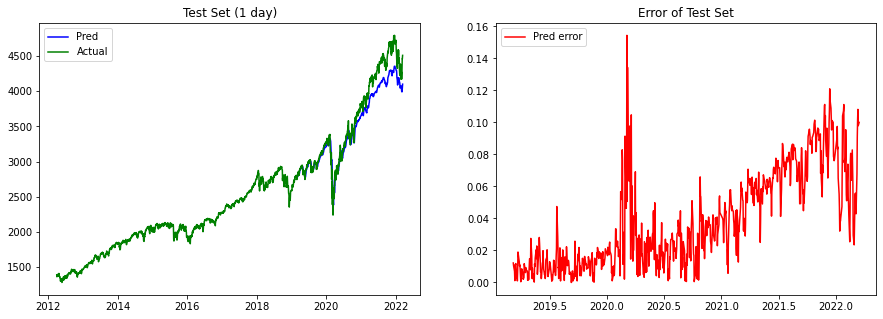

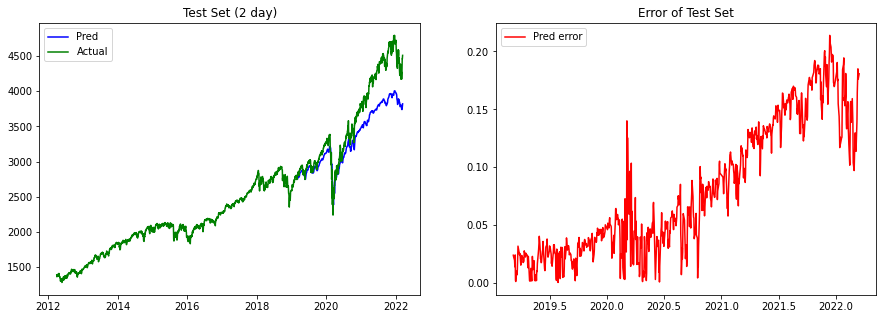

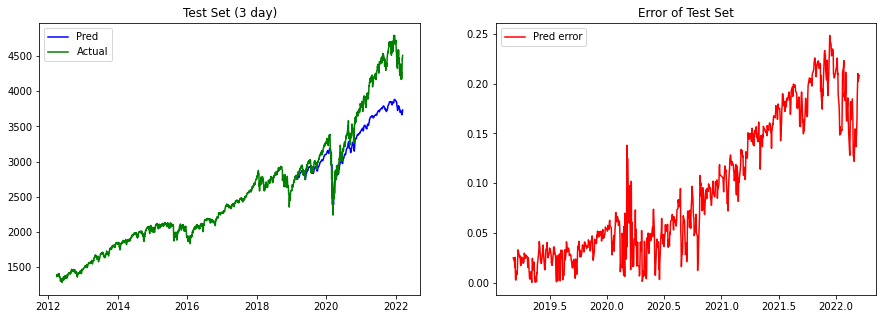

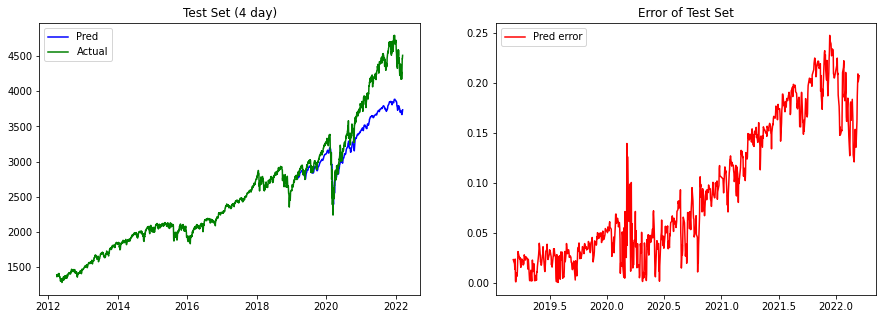

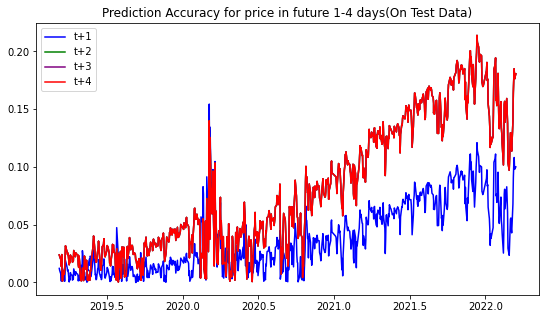

In [277]:
RNN.eval()
xTensor = torch.from_numpy(X_test).float()
output, _ = RNN(xTensor)

output_plt1 = output.detach().numpy()[:, 0]
output_plt1 = norm.inverse_transform(output_plt1.reshape(-1,1))

output_plt2 = output.detach().numpy()[:, 1]
output_plt2 = norm.inverse_transform(output_plt2.reshape(-1,1))

output_plt3 = output.detach().numpy()[:, 2]
output_plt3 = norm.inverse_transform(output_plt3.reshape(-1,1))

output_plt4 = output.detach().numpy()[:, 3]
output_plt4 = norm.inverse_transform(output_plt4.reshape(-1,1))

Y_testplt = norm.inverse_transform(Y_test[:, :, 0])

plotNoiselessGraphs(output_plt1,output_plt2,output_plt3,output_plt4,Y_testplt,Y_plt,dateAxis,date_t,
"Test Set (1 day)","Test Set (2 day)","Test Set (3 day)","Test Set (4 day)","Error of Test Set")

plotAccuracy(output_plt1,output_plt2,output_plt3,output_plt4,Y_testplt,date_t, 'Prediction Accuracy for price in future 1-4 days(On Test Data)' )

# Step 6 - Optimize your CNN+RNN algorithm's performance 

### Adjust the parameter of the network and enhance the sliding window size

In [ ]:
input_size = 4
output_size =4
hidden_dim = 32
n_layers = 2
epochs = 200
window_size = 50


X = []
Y = []
for i in range(trainData.shape[0] - window_size - 4):
    X.append(trainData[i:i+window_size])
    Y.append(targetData[i+window_size:i+window_size+4])
X = np.array(X)
Y = np.array(Y)
Y = np.swapaxes(Y, 1, 2)
X_fullTraining = []
X_training = []
X_validation = []
X_test = []
Y_fullTraining = []
Y_training = []
Y_validation = []
Y_test = []

dateAxis = []
for i in range(date.shape[0]):
    dateAxis.append(float(np.squeeze(date)[i][6:10]) + ( (float(np.squeeze(date)[i][0:2])-1)*30 + float(np.squeeze(date)[i][3:5]) )/366 )
dateAxis = np.array(dateAxis)
#dateAxis = dateAxis[(window_size+4):]


X_fullTraining, X_test, Y_fullTraining, Y_test, date_ft, date_t = train_test_split(X, Y, dateAxis, test_size=0.3, shuffle=False)
X_training, X_validation, Y_training, Y_validation, date_tr, date_v = train_test_split(X_fullTraining, Y_fullTraining, date_ft, test_size=0.3, shuffle=False)

In [247]:
RNN = Model(input_size, output_size, hidden_dim, n_layers)
RNN.cnn = CNet(45*20)
optimizer = torch.optim.Adam(RNN.parameters(), lr=0.001)
criterion = nn.MSELoss()
import pdb
#pdb.set_trace()
xTensor = torch.from_numpy(X_fullTraining).float()
yTensor = torch.Tensor(Y_fullTraining).float()

for epoch in range(epochs):
    optimizer.zero_grad()
    
    output, hidden = RNN(xTensor)
    loss = criterion(output.reshape(-1), yTensor.view(-1))
    loss.backward()
    
    optimizer.step()
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, epochs), end=' ')
        print("Loss:", loss.item())

Epoch: 0/200............. Loss: 0.03797280415892601
Epoch: 10/200............. Loss: 0.013532129116356373
Epoch: 20/200............. Loss: 0.011206714436411858
Epoch: 30/200............. Loss: 0.005967759061604738
Epoch: 40/200............. Loss: 0.0017786811804398894
Epoch: 50/200............. Loss: 0.0010789033258333802
Epoch: 60/200............. Loss: 0.000509797828271985
Epoch: 70/200............. Loss: 0.0003628599806688726
Epoch: 80/200............. Loss: 0.0003244680992793292
Epoch: 90/200............. Loss: 0.00031095533631742
Epoch: 100/200............. Loss: 0.0003008472267538309
Epoch: 110/200............. Loss: 0.0002939135010819882
Epoch: 120/200............. Loss: 0.0002881318505387753
Epoch: 130/200............. Loss: 0.0002830821613315493
Epoch: 140/200............. Loss: 0.0002784810494631529
Epoch: 150/200............. Loss: 0.00027430427144281566
Epoch: 160/200............. Loss: 0.00027041067369282246
Epoch: 170/200............. Loss: 0.00026666774647310376
Epoch: 1

ValueError: x and y must have same first dimension, but have shapes (2540,) and (2495, 1)

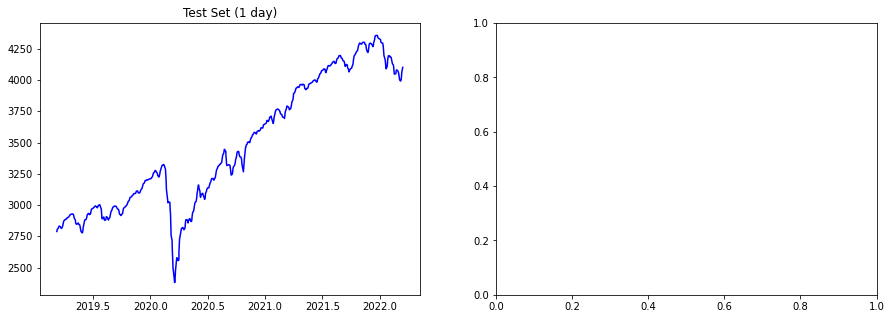

In [278]:
RNN.eval()
xTensor = torch.from_numpy(X_test).float()
output, _ = RNN(xTensor)

output_plt1 = output.detach().numpy()[:, 0]
output_plt1 = norm.inverse_transform(output_plt1.reshape(-1,1))

output_plt2 = output.detach().numpy()[:, 1]
output_plt2 = norm.inverse_transform(output_plt2.reshape(-1,1))

output_plt3 = output.detach().numpy()[:, 2]
output_plt3 = norm.inverse_transform(output_plt3.reshape(-1,1))

output_plt4 = output.detach().numpy()[:, 3]
output_plt4 = norm.inverse_transform(output_plt4.reshape(-1,1))

Y_testplt = norm.inverse_transform(Y_test[:, :, 0])
import pdb
#pdb.set_trace()
plotNoiselessGraphs(output_plt1,output_plt2,output_plt3,output_plt4,Y_testplt,Y_plt[45:],dateAxis,date_t,
"Test Set (1 day)","Test Set (2 day)","Test Set (3 day)","Test Set (4 day)","Error of Test Set")

plotAccuracy(output_plt1,output_plt2,output_plt3,output_plt4,Y_testplt,date_t,'Prediction Accuracy for price in future 1-4 days(Optimized )' )

# Step 7 - Enhance your CNN+RNN algorithm's functionality 

In [ ]:
# start with $1 m 
money = 1
money_all = []
trade_all = []

# Must buy the new stock before sell
lastsell = -nsample

for i in range(1,X_fullTraining.shape[0]):
    tmp = norm.inverse_transform(X_fullTraining[i,:, :])
    
    prob_temp = tmp[:, 2]
    price_temp = tmp[:, 0]
    
    # Sell when has high prob
    if prob_temp[nsample-1] > 0.9 and (i-lastsell > nsample):
        
        
        # The buy at a low PE ration
        
        buy_price = min(price_temp)
        
        if buy_price > 0:
            sell_price = price_temp[len(price_temp)-1]
            
            money*= (sell_price/buy_price)
            
            lastsell = i
            money_all.append(money)
            trade_all.append(i)
            
            print(buy_price)
            print(sell_price)
            print(money)
            print(i)   
            

# Step 8 - Determine the Effect of Input Data Perturbations(Price Uncertainty) on your Algorithm

## 8a) Using your Optimized CNN+RNN algorithm (from Step 6, above) corrupt your Test Set that you used in Step 5

In [283]:
def add_noisy(dataset, threshold):
    dataset_noise = np.ndarray(shape=dataset.shape, dtype=np.float32)
    #set random seed 
    random.seed(2)
    for i in range(len(dataset)):
        
        s = np.random.normal(0, threshold, 20)
        idx = random.sample(list(range(window_size)), 20)
        dataset_noise[i] = dataset[i] 
        
        #scale the s by the sampling window
        s = max(X_test[1, idx, 0])*s
        tmp = dataset_noise[i, idx, 0] + s
        # modify the data when negative
        tmp[tmp < 0] = 1e-7
        dataset_noise[i, idx, 0]  = temp
        
    return dataset_noise   

## 8b) Repeat Tests in Step 6, above, with noise-corrupted Test Set.

In [284]:
std = [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1 ]

idx = 0
out_tmp = np.concatenate( (Y_test[:, :, idx], Y_test[:, :, idx], Y_test[:, :, idx]), axis = 1)
target_test = norm.inverse_transform(out_tmp)[:, [0]]
error_res_all = []

for threshold in std:
    print(threshold)
    dataset_test_noise = add_noisy(X_test, threshold)
    test_inputs = Variable(torch.from_numpy(dataset_test_noise).float())
    output_test, _ = RNN(test_inputs)
    out_tmp = np.concatenate((output_test.detach().numpy()[:, [idx]], 
                               output_test.detach().numpy()[:, [idx]],  
                               output_test.detach().numpy()[:, [idx]]), axis=1)
    
    predicted_price_test = norm.inverse_transform(out_tmp)[:, [0]]
    error = prediction_error(target_test, predicted_price_test)
    error_res_all.append(error.reshape(-1))


0


ValueError: Sample larger than population or is negative

## 8c) Repeat Step 7, above, to Determine How Much Money You Make or Lose

0


NameError: name 'color' is not defined

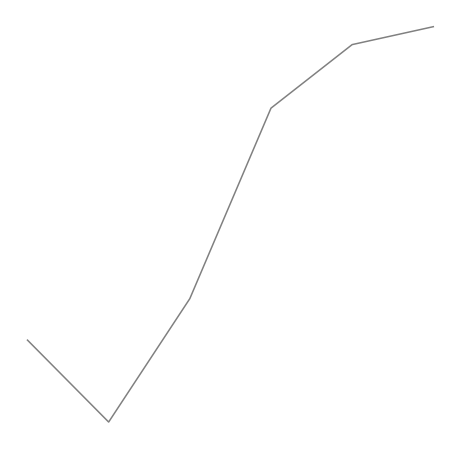

In [287]:
test_img = []
for i in range(X_test.shape[0]):  
    if i%500 == 0:
        print(i)
    x = X_test[i,:, 0]
    # make plot for the sp500 price data    
    plt.axis('off')
    plt.plot(x, color ="grey") 
    
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    fig.canvas.draw()
       
    width, height = fig.get_size_inches() * fig.get_dpi()
    
    mplimage = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(576, 576, 3)
    
    gray_image = color.rgb2gray(mplimage)
    img_resize = resize(gray_image, (180, 180),anti_aliasing=True)
    img_resize = img_resize.astype('float32')
    plt.clf()   
    # appending the image into the list
    test_img.append(img_resize)
    
test_x = np.array(test_img)


In [286]:
# convert image format for torch
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])
test_x = torch.from_numpy(test_x)
test_x.shape

NameError: name 'test_x' is not defined

In [ ]:
# predict sell signal
with torch.no_grad():
    output,_ = model(test_x)

prob = torch.nn.functional.softmax(output, dim=1)
'''
if  prob > 0.5
      sell
 else:
      keep
'''

In [ ]:
money_res_all = []
trade_res_all = []
# sd = [0.001]
# standard deviation
sd = [0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(X_test, sigma)
    # loading images of the test dataset
    test_img = []
    for i in range(dataset_test_noise.shape[0]):  
        if i%500 == 0:
            print(i)
        x = dataset_test_noise[i,:, 0]
        # function to plot the sp500 price data    
        plt.axis('off')
        plt.plot(x, color ="black") 
        figure = plt.gcf()
        figure.set_size_inches(8, 8)
        figure.canvas.draw()

        width, height = figure.get_size_inches() * figure.get_dpi()
        mplimage = np.frombuffer(figure.canvas.tostring_rgb(), dtype='uint8').reshape(576, 576, 3)
        gray_image = color.rgb2gray(mplimage)
        img_resize = resize(gray_image, (180, 180),anti_aliasing=True)
        img_resize = img_resize.astype('float32')
        plt.clf()   
        # appending the image into the list
        test_img.append(img_resize)

    # converting the list to numpy array
    test_x = np.array(test_img)
    
    # converting images into torch format
    test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])
    test_x = torch.from_numpy(test_x)
    
    
    # predict sell signal for whole dataset
    with torch.no_grad():
        output = model(test_x)

    softmax = torch.exp(output)
    # if prob > 0.5 then sell signal
    # otherwise, hold 
    prob = softmax.numpy()[:,1]/np.sum(softmax.numpy(), axis = 1) 
    
    # assuming you start with $1 million.
    money = 1
    money_full = []
    trade_full = []
    # if you haven't sell the stock, you cannot buy the new stock, in that case buypower = 0
    lastselltime = 0
    for i in range(1, X_test.shape[0]):
        temp = norm.inverse_transform(X_test[i,:, :])
        prob_temp = prob[i]
        price_temp = temp[:, 0]
        date_diff = date_test[i,0] - date_test[lastselltime,0]
        days = date_diff.astype('timedelta64[D]')
        days_diff = days / np.timedelta64(1, 'D')
        if prob_temp > 0.95 and (days_diff > nsample):
            # sell at this point
            # buy at the local minia in this window interval
            buy_price = min(price_temp)
            # in case of the overflow
            if buy_price > 0:              
                sell_price = price_temp[len(price_temp)-1]
                money = sell_price/buy_price*money
                lastselltime = i
                print(money)
                print(i)   
                money_full.append(money)
                trade_full.append(i)
                
            
    money_res_all.append(money_full)
    trade_res_all.append(trade_full)

In [279]:
cmaps= ['red','orange',  'yellow', 'green','blue', 'purple', 'pink', 'grey', 'brown', 'black' ]
plt.figure(1, figsize=(12, 6))
for i in range(len(std)):   
    plt.plot(date_test[trade_res_all[i]], money_res_all[i] , color=cmaps[i], lw=1, label = sd[i], marker= 'o')
    
plt.ylabel('Money/millions')
plt.xlabel('Time')

plt.title('Money Earned for CNN+RNN Model with Noise-Corrupted Test Data <2012-2020> (Optimized)')
plt.legend(loc="upper left") 

NameError: name 'std' is not defined

<Figure size 864x432 with 0 Axes>

# Step 9 - Modify the CNN+RNN algorithm in this assignment to generate a BUY signal as well as a SELL signal.  Then optimize your enhanced algorithm as stated in Steps 5 and 6. 